In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib

Using matplotlib backend: module://matplotlib_inline.backend_inline


In [3]:
students = pd.read_csv("Student_Performance.csv")

stress_mapping = {"Yes": 1, "No": 0}
students["Extracurricular Activities Score"] = students["Extracurricular Activities"].map(stress_mapping)
numeric_columns = students.select_dtypes(include=['number'])

**Check the head of the dataframe.**

In [7]:
print(students.head())


   Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0              7               99                        Yes            9   
1              4               82                         No            4   
2              8               51                        Yes            7   
3              5               52                        Yes            5   
4              7               75                         No            8   

   Sample Question Papers Practiced  Performance Index  \
0                                 1               91.0   
1                                 2               65.0   
2                                 2               45.0   
3                                 2               36.0   
4                                 5               66.0   

   Extracurricular Activities Score  
0                                 1  
1                                 0  
2                                 1  
3                                 1 

# EDA

Since this data is artificial, we'll just do a large pairplot with seaborn.

**Use seaborn on the dataframe to create a pairplot with the hue indicated by the TARGET CLASS column.**

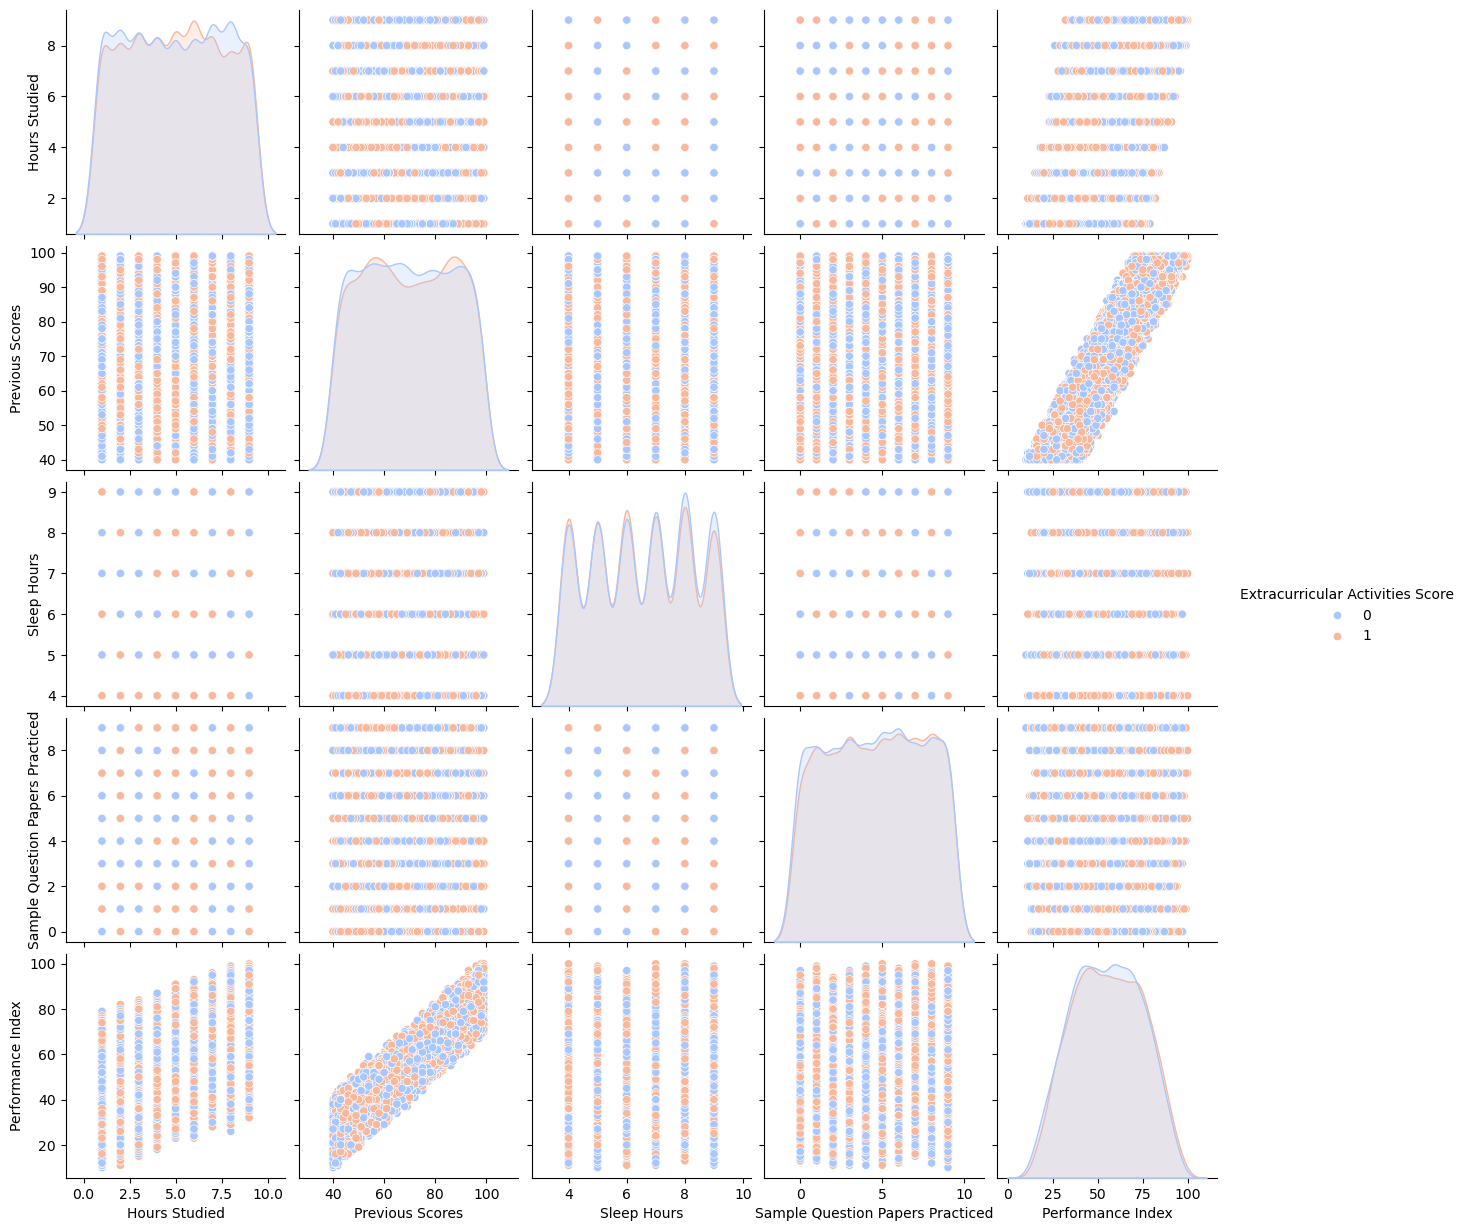

In [10]:
g = sns.pairplot(numeric_columns, hue = 'Extracurricular Activities Score', palette='coolwarm')
plt.show()


# Standardize the Variables

Time to standardize the variables.

** Import StandardScaler from Scikit learn.**

In [12]:
from sklearn.preprocessing import StandardScaler


** Create a StandardScaler() object called scaler.**

In [14]:
scaler = StandardScaler()

** Fit scaler to the features.**

In [16]:
scaler.fit(numeric_columns.drop('Extracurricular Activities Score',axis=1))

StandardScaler()

**Use the .transform() method to transform the features to a scaled version.**

In [18]:
scaled_features = scaler.transform(numeric_columns.drop('Extracurricular Activities Score',axis=1))

**Convert the scaled features to a dataframe and check the head of this dataframe to make sure the scaling worked.**

In [25]:
df_feat = pd.DataFrame(scaled_features,columns=numeric_columns.columns[:-1])
df_feat.head()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,0.775188,1.704176,1.456205,-1.249754,1.862167
1,-0.383481,0.723913,-1.492294,-0.900982,0.508818
2,1.161410,-1.063626,0.276805,-0.900982,-0.532220
3,0.002742,-1.005963,-0.902594,-0.900982,-1.000687
4,0.775188,0.320275,0.866505,0.145333,0.560870


# Train Test Split

**Use train_test_split to split your data into a training set and a testing set.**

In [28]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,numeric_columns['Extracurricular Activities Score'],test_size=0.30)

In [32]:
from sklearn.svm import SVC

help(SVC)

In [35]:
svm = SVC(kernel="rbf", gamma=0.5, C=1.0)

In [37]:
svm.fit(X_train,y_train)

SVC(gamma=0.5)

In [38]:
pred = svm.predict(X_test)

** Create a confusion matrix and classification report.**

In [40]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [44]:
print(confusion_matrix(y_test,pred))
print(accuracy_score(y_test,pred))

[[867 635]
 [803 695]]
0.5206666666666667


In [46]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.52      0.58      0.55      1502
           1       0.52      0.46      0.49      1498

    accuracy                           0.52      3000
   macro avg       0.52      0.52      0.52      3000
weighted avg       0.52      0.52      0.52      3000



In [48]:
error_rate = []

for i in range(1,40):
    
    svm = SVC(kernel="rbf", gamma=0.5, C=i)
    svm.fit(X_train,y_train)
    pred_i = svm.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

**Now create the following plot using the information from your for loop.**

Text(0, 0.5, 'Error Rate')

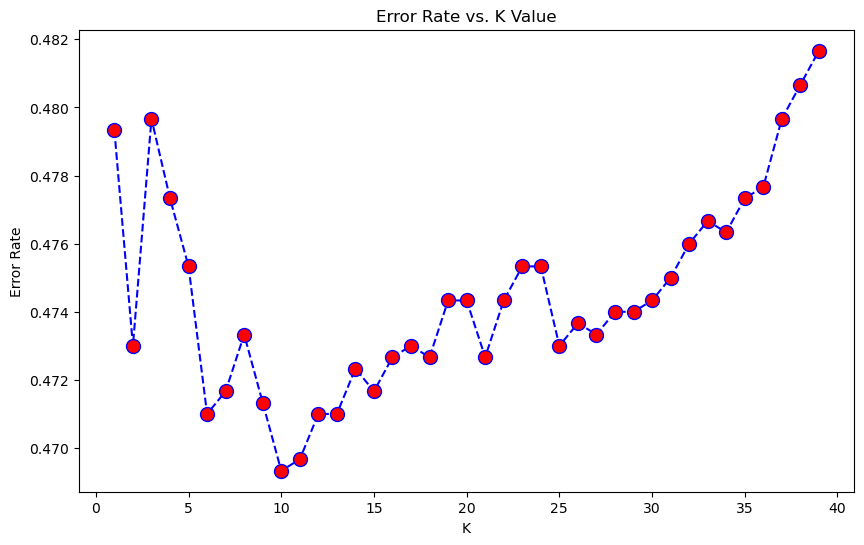

In [51]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')


In [53]:
# NOW WITH C=10
svm = SVC(kernel="rbf", gamma=0.5, C=10)

svm.fit(X_train,y_train)
pred = svm.predict(X_test)

print(confusion_matrix(y_test,pred))
print('\n')
print(accuracy_score(y_test,pred))
print('\n')
print(classification_report(y_test,pred))


[[852 650]
 [758 740]]


0.5306666666666666


              precision    recall  f1-score   support

           0       0.53      0.57      0.55      1502
           1       0.53      0.49      0.51      1498

    accuracy                           0.53      3000
   macro avg       0.53      0.53      0.53      3000
weighted avg       0.53      0.53      0.53      3000



# Great Job!